In [1]:
import BOX_1 as B
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray
import multiprocessing as mp

In [6]:
step_tot = 5*10**6
check_step = 100

In [7]:
box = B.BOX(100,1000,0,0,[0.,10.],1.)
av_c_size = np.zeros(check_step,dtype=float)
for n_steps in range(check_step):
    box.monte_carlo_steps(step_tot//check_step)
    av_c_size[n_steps] = np.mean(box.cluster_size())

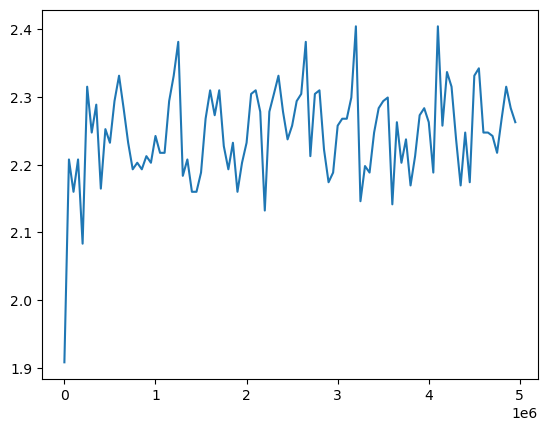

In [8]:
plt.plot([i*(step_tot//check_step) for i in range(check_step)],av_c_size)

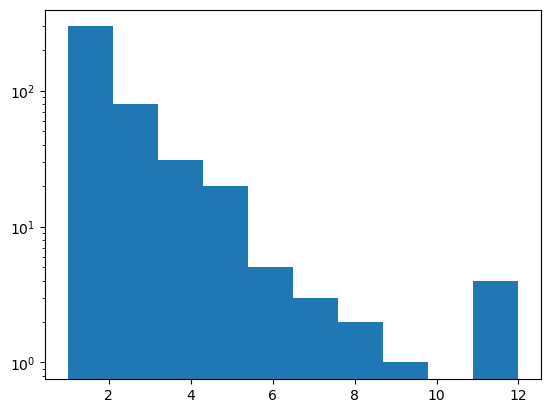

In [9]:
plt.hist(box.cluster_size())
plt.yscale('log')

In [10]:
box.compute_av_Nneigh()

1.3279999999999872

In [33]:
def run_simulation(L: int, nparticles: int, interactions: list, temperature: float, step_tot: int):
    box = B.BOX(L, nparticles, interactions, temperature)
    box.monte_carlo_steps(step_tot)    
    return box.cluster_size()

In [36]:
# Define the parameters for each simulation
simulations_params = [(400, 1000, [0., E], 1.,5*10**7) for E in [5.,10.,15.,20.]]
# Create a pool of worker processes
with mp.Pool(processes=4) as pool:
    # Map the simulation function to the list of parameter sets
    print(simulations_params)
    results = pool.starmap(run_simulation, simulations_params)

[(400, 1000, [0.0, 5.0], 1.0, 50000000), (400, 1000, [0.0, 10.0], 1.0, 50000000), (400, 1000, [0.0, 15.0], 1.0, 50000000), (400, 1000, [0.0, 20.0], 1.0, 50000000)]


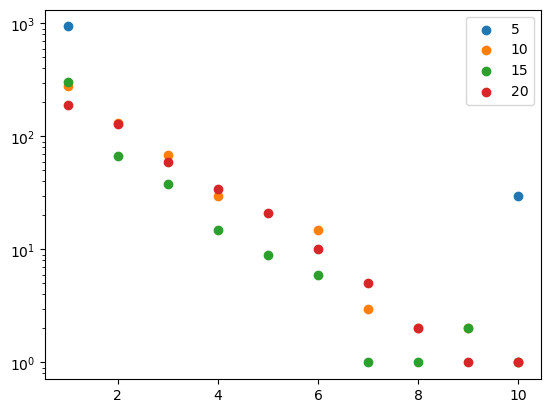

In [42]:
for E,res in zip([5,10,15,20],results):
    hist,bins = np.histogram(res)
    plt.scatter([i for i in range(1,hist.shape[0]+1)],hist, label = E)
plt.yscale('log')
plt.legend()

In [49]:
# Define the parameters for each simulation
simulations_params = [(400, N, [0., 15.], 1.,5*10**7) for N in [10**2,10**3,10**4,10**5]]
# Create a pool of worker processes
with mp.Pool(processes=4) as pool:
    # Map the simulation function to the list of parameter sets
    print(simulations_params)
    results_N = pool.starmap(run_simulation, simulations_params)

[(400, 100, [0.0, 15.0], 1.0, 50000000), (400, 1000, [0.0, 15.0], 1.0, 50000000), (400, 10000, [0.0, 15.0], 1.0, 50000000), (400, 100000, [0.0, 15.0], 1.0, 50000000)]


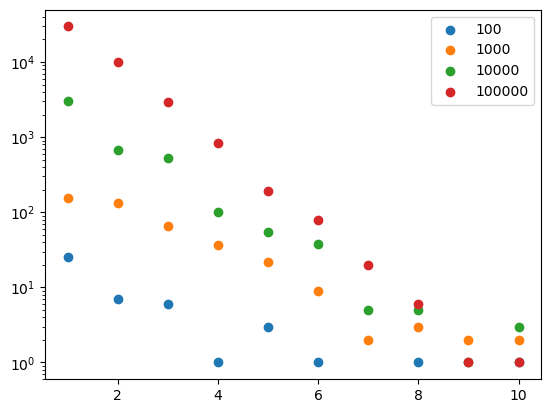

In [50]:
for E,res in zip([10**2,10**3,10**4,10**5],results_N):
    hist,bins = np.histogram(res)
    plt.scatter([i for i in range(1,hist.shape[0]+1)],hist, label = E)
plt.yscale('log')
plt.legend()